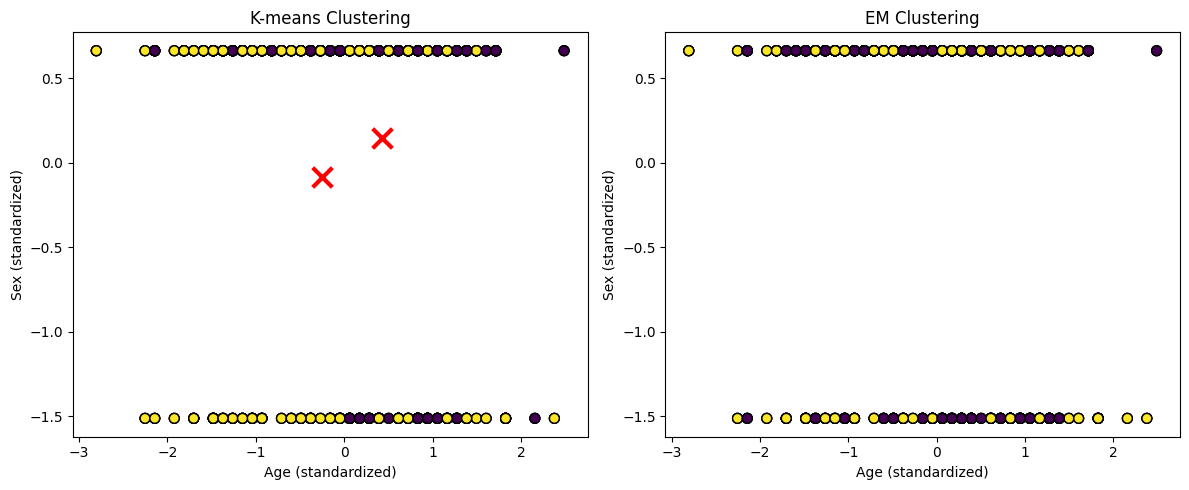

Silhouette Score (K-means): 0.1687
Silhouette Score (EM): 0.1107


In [16]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
# Assuming heart.csv is in a subdirectory named "data"
# If heart.csv is in the current directory, remove the "data/"
df = pd.read_csv("/content/heart.csv")
features = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak",
"slope", "ca", "thal"]
df = df.dropna()
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
gmm = GaussianMixture(n_components=2, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='viridis', edgecolors='k', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200,
linewidths=3, color='r')
plt.title('K-means Clustering')
plt.xlabel('Age (standardized)')
plt.ylabel('Sex (standardized)')
plt.subplot(1, 2, 2)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=gmm_labels, cmap='viridis', edgecolors='k', s=50)
plt.title('EM Clustering')
plt.xlabel('Age (standardized)')
plt.ylabel('Sex (standardized)')
plt.tight_layout()
plt.show()
silhouette_kmeans = silhouette_score(X_scaled, kmeans_labels)
silhouette_gmm = silhouette_score(X_scaled, gmm_labels)
print(f'Silhouette Score (K-means): {silhouette_kmeans:.4f}')
print(f'Silhouette Score (EM): {silhouette_gmm:.4f}')